# Loading Dataset

In [1]:
import numpy as np
import tensorflow as tf 
import NeuralNetwork as nn
import Optimisers as opt

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test[0].shape
X_batch = X_test[0:10000]
X_batch.shape

(10000, 32, 32, 3)

# Plotting first image in the train dataset.
Just to get a feel of how dataset image looks like or to simply understand the image.

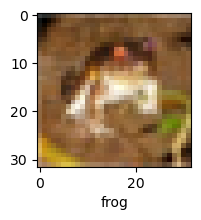

In [3]:
import matplotlib.pyplot as plt

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_data(X, y, index):
    plt.figure(figsize=(10, 2))  # Scaling the image
    plt.imshow(X[index])
    plt.xlabel(classes[(y[index])[0]]) # Because y_train[index] return [val]

plot_data(X_train, y_train, 0)

# Embedding the X_train and X_test images into vector.

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# standardizing the training data
mean = X_train.mean(axis=0, keepdims=True)
std = X_train.std(axis=0, keepdims=True) + 1e-6  # 1e-6 prevents division by zero

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

print(f"X_train mean: {X_train.mean():.6f}, std: {X_train.std():.6f}")
print(f"X_test mean: {X_test.mean():.6f}, std: {X_test.std():.6f}")

# Normalising raw pixels
# X_train = X_train.astype(np.float32) / 255.0
# X_test  = X_test.astype(np.float32) / 255.0


X_train mean: 0.000000, std: 1.000000
X_test mean: 0.012871, std: 0.998512


# One hot y_labels before training.
My backward pass assumes one hot labels during gradient calculation(dA). So, numpy was silently breaking learning which resulted in argmax always returning 0 hence giving accuracy of 100% everyt epoch.
### Solution:
reshaping y_labels on both train and test to be one_hot.

In [5]:
def one_hot(y, num_classes=10):
    y = y.flatten()
    oh = np.zeros((y.shape[0], num_classes))
    oh[np.arange(y.shape[0]), y] = 1
    return oh

# Example
print(y_test[:5])

y_train = one_hot(y_train)
y_test  = one_hot(y_test)

# Example:
print(y_test[:5])

y_test.shape

[[3]
 [8]
 [8]
 [0]
 [6]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


(10000, 10)

# Making a model using NeuralNetwork Class

In [ ]:
optimizer = opt.SGDMomentum(lr=0.01, beta=0.9)

model_actual = nn.NeuralNetwork(
    input_size=3072,
    hidden_layers=[512, 256, 128],  #one hidden layer
    output_size=10,
    activations=["relu", "relu", "relu"],
    dropout_rates=[0.3, 0.3, 0.3]  #dropout only applied in hidden layers.
)

history = model_actual.train(
    X=X_train,
    y=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=25,       
    batch_size=128,
    optimizer=optimizer
)



/Users/sujitbhatta/Desktop/P-MforAI/task_1/activations/Softmax.py:78: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(np.sum(self.probs * cache_labels, axis=1))
/Users/sujitbhatta/Desktop/P-MforAI/task_1/NeuralNetwork.py:156: RuntimeWarning: overflow encountered in matmul
  Z = A @ self.W[i] + self.b[i]
/Users/sujitbhatta/Desktop/P-MforAI/task_1/activations/Softmax.py:70: RuntimeWarning: invalid value encountered in subtract
  shifted = logits - np.max(logits, axis=1, keepdims=True)


Epoch 1 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 2 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 3 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 4 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 5 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 6 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 7 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 8 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 9 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 10 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 11 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 12 / 25, Train Loss: nan, Train Acc: 9.52%, Val Loss: nan, Val Acc: 11.40%
Epoch 13 / 25, Train Loss: nan, Train

{'train_loss': [np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan)],
 'train_acc': [np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(0.0952),
  np.float64(

# Training Visualisations

Plotting training and validation metrics to diagnose overfitting/underfitting

NameError: name 'history' is not defined

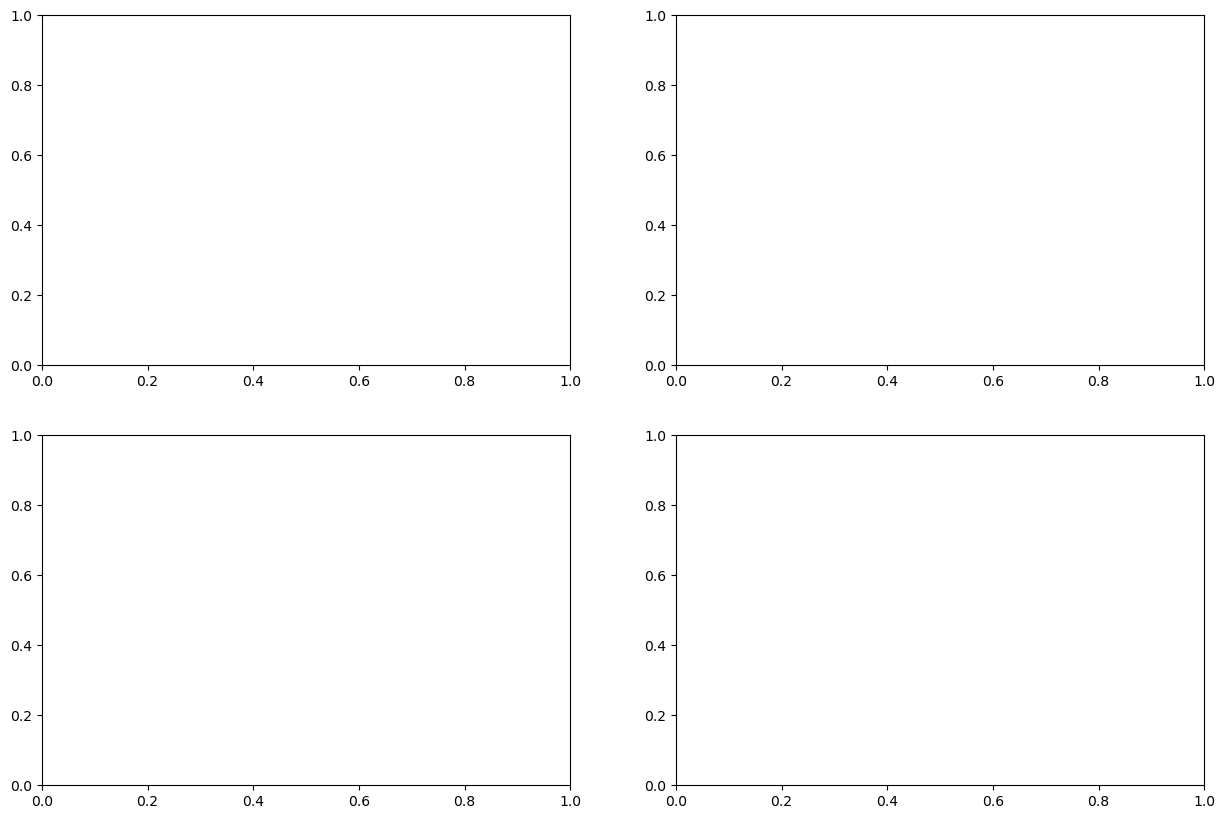

In [8]:
import matplotlib.pyplot as plt

# Create figure with 2x2 subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

epochs_range = range(1, len(history['train_loss']) + 1)

# Graph 1: Training and Validation Loss
axes[0], axes[0].plot(epochs_range, history['train_loss'], 'b-', label='Training Loss', linewidth=2)
axes[0], axes[0].plot(epochs_range, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[0], axes[0].set_xlabel('Epoch', fontsize=12)
axes[0], axes[0].set_ylabel('Loss', fontsize=12)
axes[0], axes[0].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0], axes[0].legend(fontsize=10)
axes[0], axes[0].grid(True, alpha=0.3)

# Graph 2: Training and Validation Accuracy
axes[0], axes[1].plot(epochs_range, [acc * 100 for acc in history['train_acc']], 'b-', label='Training Accuracy', linewidth=2)
axes[0], axes[1].plot(epochs_range, [acc * 100 for acc in history['val_acc']], 'r-', label='Validation Accuracy', linewidth=2)
axes[0], axes[1].set_xlabel('Epoch', fontsize=12)
axes[0], axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[0], axes[1].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0], axes[1].legend(fontsize=10)
axes[0], axes[1].grid(True, alpha=0.3)

# Graph 3: Loss Gap (Overfitting indicator)
loss_gap = [val - train for train, val in zip(history['train_loss'], history['val_loss'])]
axes[0], axes[2].plot(epochs_range, loss_gap, 'purple', linewidth=2)
axes[0], axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0], axes[2].set_xlabel('Epoch', fontsize=12)
axes[0], axes[2].set_ylabel('Loss Gap (Val - Train)', fontsize=12)
axes[0], axes[2].set_title('Overfitting Indicator (Loss Gap)', fontsize=14, fontweight='bold')
axes[0], axes[2].grid(True, alpha=0.3)
axes[0], axes[2].fill_between(epochs_range, 0, loss_gap, where=[gap > 0 for gap in loss_gap], 
                         color='red', alpha=0.3, label='Overfitting')

# Graph 4: Accuracy Gap
acc_gap = [(train - val) * 100 for train, val in zip(history['train_acc'], history['val_acc'])]
axes[0], axes[3].plot(epochs_range, acc_gap, 'orange', linewidth=2)
axes[0], axes[3].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0], axes[3].set_xlabel('Epoch', fontsize=12)
axes[0], axes[3].set_ylabel('Accuracy Gap (Train - Val) %', fontsize=12)
axes[0], axes[3].set_title('Overfitting Indicator (Accuracy Gap)', fontsize=14, fontweight='bold')
axes[0], axes[3].grid(True, alpha=0.3)
axes[0], axes[3].fill_between(epochs_range, 0, acc_gap, where=[gap > 0 for gap in acc_gap], 
                         color='red', alpha=0.3, label='Overfitting')

plt.tight_layout()
plt.show()

# Print final metrics
print(f"FINAL RESULTS:")
print(f"Final Training Accuracy: {history['train_acc'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history['val_acc'][-1] * 100:.2f}%")
print(f"Final Training Loss: {history['train_loss'][-1]:.4f}")
print(f"Final Validation Loss: {history['val_loss'][-1]:.4f}")
print(f"Accuracy Gap: {(history['train_acc'][-1] - history['val_acc'][-1]) * 100:.2f}%")
print(f"Loss Gap: {history['val_loss'][-1] - history['train_loss'][-1]:.4f}")